# SYRIA TEL CUSTOMER CHURN

Syria Tel is one of the three telecommunication company in Syria. It is a mobile network provider in Syria. Syria Tel needs competitive edge against its competitors including data driven insights on how to improve their business. 

### PROBLEM STATEMENT

Syria Tel has discovered that their customers have started to churn, discontinue their services. This poses a major risk to the company. The challenge is to Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company

#### OBJECTIVES

1. Determine what features will indicate if a customer will discontinue their services. 

In [3]:
# importing libraries
import pandas as pd
from scipy import stats

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# importing functions
from functions import *

# feature selection
from sklearn.model_selection import train_test_split,  cross_val_score,  GridSearchCV
from imblearn.over_sampling import SMOTE

# preprocessing data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# model evaluation
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix, f1_score, ConfusionMatrixDisplay, auc, precision_score, recall_score

## DATA UNDERSTANDING

This project uses data from [Churn in Telcom Dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/code)

### Loading data

In [4]:
df = pd.read_csv("/home/timothy/development/DS/projects/syriatel customer churn/bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.shape

(3333, 21)

In [6]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Here is a summary of the contents of the columns:
1. state: The state of the customer.
2. account length: The length of the account in days or months.
3. area code: The area code of the customer's phone number.
4. phone number: The phone number of the customer.
5. international plan: Whether the customer has an international plan or not.
6. voice mail plan: Whether the customer has a voicemail plan or not.
7. number vmail messages: The number of voicemail messages the customer has.
8. total day minutes: Total minutes of day calls.
9. total day calls: Total number of day calls.
10. total day charge: Total charge for the day calls.
11. total eve minutes: Total minutes of evening calls.
12. total eve calls: Total number of evening calls.
13. total eve charge: Total charge for the evening calls.
14. total night minutes: Total minutes of night calls.
15. total night calls: Total number of night calls.
16. total night charge: Total charge for the night calls.
17. total intl minutes: Total minutes of international calls.
18. total intl calls: Total number of international calls.
19. total intl charge: Total charge for the international calls.
20. customer service calls: Number of times the customer called customer service.
21. churn: Whether the customer churned or not (True/False)

In [8]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### DATA CLEANING

Data cleaning is useful in finding duplicates and null values that may mess with our machine learning algorithms

In [9]:
# check for null values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
# check for duplicates
df.duplicated().sum()

0

This is a  decent dataset. There are no duplicates nor null values 

In [11]:
#  remove any whitespace on the columns
df.columns.str.strip()

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### DATA EXPLORATION

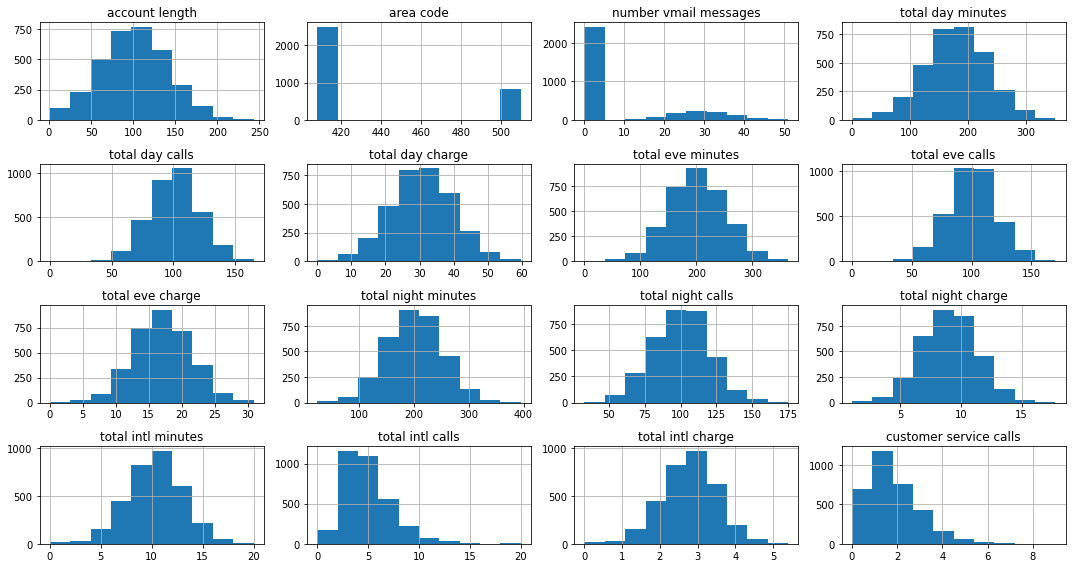

In [12]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,8))
df.drop("churn", axis=1).hist(ax=ax)
plt.tight_layout()

In [13]:
df.groupby("churn")["area code"].count()

churn
False    2850
True      483
Name: area code, dtype: int64

In [14]:
df["state"].value_counts()

state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

In [15]:
df["international plan"].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

In [16]:
df["voice mail plan"].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

In [17]:
df["churn"].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

#### Dropping outliers

In [18]:
#  we drop outliers with more than 3 standard deviations
drop_numerical_outliers(df)
df.shape

(3169, 21)

#### Checking for multinollinearity

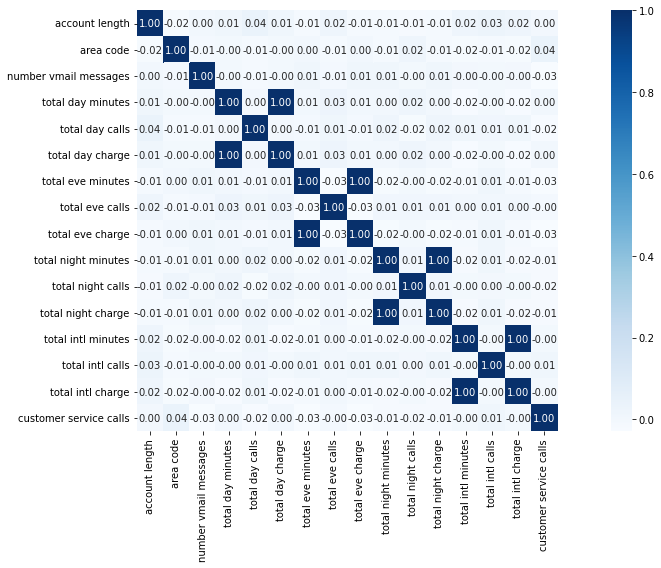

In [19]:
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='Blues', square=True, fmt='.2f', ax=ax)
plt.tight_layout()

There are is multicollinearity among features. 
There is perfect multicollinearity among call minutes and call charge. This is understandable because minutes are used to calculate the charge. 

#### DATA ANALYSIS

##### ACCOUNT LENGTH

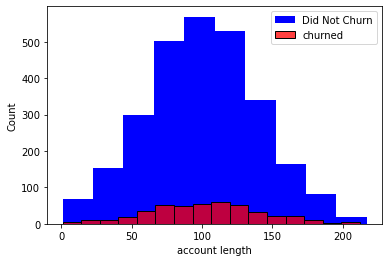

In [20]:
stayed_account_len = df[df["churn"] == False]["account length"]
churn_account_len = df[df["churn"] == True]["account length"]
fig, ax = plt.subplots()
ax.hist(stayed_account_len, color="b", label="Did Not Churn")
sns.histplot(churn_account_len, color="r", label="churned")
ax.legend()

There is no big difference in the account length of the customers who churned compared to customers who stayed. 

#### Area Code

<AxesSubplot:xlabel='area code', ylabel='count'>

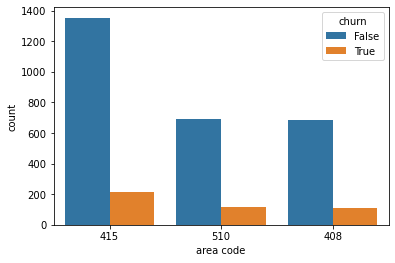

In [21]:
sns.countplot(x="area code", hue="churn", data=df, order=df["area code"].value_counts().iloc[0:15].index)


#### FEATURE ENGINEERING

##### Drop unnecessary columns

In [22]:
df.drop("phone number", axis=1, inplace=True)

##### Drop columns with multicollinearity

In [23]:

mask = np.triu(np.ones_like(corr, dtype=bool))
tri_df = corr.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [column for column in tri_df.columns if any(tri_df[column] > 0.90)]

# Now 'to_drop' contains the names of highly correlated features


df = df.drop(to_drop, axis=1)

#### Transforming the target to 0s and 1s

In [24]:
# df["churn"] = df["churn"].map({"True" : 1, "False" : 0})
df["churn"] = df["churn"].map({True: 1, False: 0})

df["churn"].value_counts()
# There is class imbalance in the target variable

churn
0    2727
1     442
Name: count, dtype: int64

##### One hot encoding

In [25]:
X = df.drop("churn", axis=1)
y = df["churn"]

X = pd.get_dummies(X, dtype=int)

#### Model Validation

Split the data to training and test data, with a 0.25 ratio and random_state=42

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

As seen above, there was imbalance on the target. We will use SMOTE to fix the imbalance

In [27]:
smote = SMOTE()
# before resampling with smote
print("Before class balancing with smote")
print(pd.Series(y_train).value_counts())
X_resampled_train, y_resampled_train = smote.fit_resample(X_train, y_train)
# after resampling with smote
print("After class balancing with smote")
print(pd.Series(y_resampled_train).value_counts())
print(X_resampled_train)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f1c0be595e0>
Traceback (most recent call last):
  File "/home/timothy/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/timothy/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/timothy/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/timothy/anaconda3/envs/learn-env/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


Before class balancing with smote
churn
0    2035
1     341
Name: count, dtype: int64
After class balancing with smote
churn
0    2035
1    2035
Name: count, dtype: int64
      account length  area code  number vmail messages  total day calls  \
0                120        415                      0               98   
1                148        510                      0               88   
2                 76        510                      0              142   
3                 98        510                      0              127   
4                 55        510                      0              100   
...              ...        ...                    ...              ...   
4065             115        510                      0               97   
4066              52        412                      0              127   
4067             151        510                      0              103   
4068              85        413                      0               81   
4069

### Transforming Our Data

We will use Min Max Scaler because we have some features that do not have a standard normal distribution 

In [28]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_resampled_train)
X_test_scaled = scaler.transform(X_test)

##  MODELLING

We use modelling rather than analysis because:
1. We want to predict beyond the observed data that we have right now. 
2. We would like to capture complex relationships and dependancies within the data that may not be easily discernible with simple data analysis techniques. 
3. Going forward, we would like to automate our decision making process beyond manual intervention. 

### BASELINE MODEL - LOGISTIC REGRESSION

Logistic regression is a supervised classifier algorithm. 
It performs a classification of your data by finding the probability of a model belonging to one group vs another. 
It is transformed in a way that the outcomes takes a value between 0 and 1. 
We will use logistic regression as our baseline model because it is a simple model. 

Train accuracy : 0.9221130221130222
Test accuracy : 0.8713745271122321
Train AUC: 0.922113022113022
Test AUC: 0.6345719109483202
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       692
           1       0.49      0.32      0.39       101

    accuracy                           0.87       793
   macro avg       0.70      0.63      0.66       793
weighted avg       0.85      0.87      0.86       793

----MODEL PERFORMANCE
accuracy : 0.8713745271122321
f1score : 0.3855421686746988


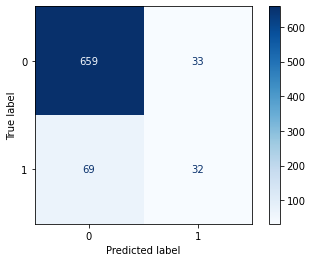

In [29]:
# Create an instance
logistic = LogisticRegression()

# fit the model
model = logistic.fit(X_train_scaled, y_resampled_train)

# predict
train_pred =  model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
cnf_matrix = confusion_matrix(y_test, test_pred)
train_fpr, train_tpr, train_thresholds = roc_curve(y_resampled_train, train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_pred)
# classification report
print(f"Train accuracy : {accuracy_score(y_resampled_train, train_pred)}")
print(f"Test accuracy : {accuracy_score(y_test, test_pred)}")
print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print(classification_report(y_test, test_pred))
print("----MODEL PERFORMANCE")
print(f"accuracy : {accuracy_score(y_test, test_pred)}")
print(f"f1score : {f1_score(y_test, test_pred)}")
disp = ConfusionMatrixDisplay(confusion_matrix= cnf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

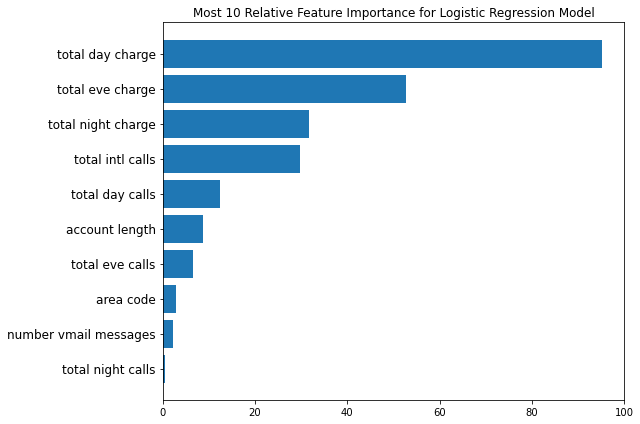

In [30]:
coefficients = model.coef_[0]
feature_importance = np.abs(model.coef_[0])

feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(9, 6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Most 10 Relative Feature Importance for Logistic Regression Model')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)

plt.tight_layout()
plt.show()

The model has an accuracy of 0.87.   It performs moderately well.   
The train accuracy is 0.92 while the train accuracy is 0.87. The drop in performance in the test data  is an indication of overfitting.  
The model has  a 0.39 f1score. This is and indication that the precision and accuracy score in our data are low.  
Being a linear model, the model may fail to capture relationships in the data that are not linear. We could try a more complex model and try and improve our scores such as f1score and accuracy as well as trying to handle the overfitting. 


### RANDOM FOREST


Random Forest is a supervised classification algorithm.
It is an ensemble method for decision trees. 
Fit the model with default values for the hyperparameters

Train accuracy : 1.0
Test accuracy : 0.9255989911727617
Train AUC: 1.0
Test AUC: 0.8347593429863218
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       692
           1       0.71      0.71      0.71       101

    accuracy                           0.93       793
   macro avg       0.83      0.83      0.83       793
weighted avg       0.93      0.93      0.93       793

----MODEL PERFORMANCE
accuracy : 0.9255989911727617
f1score : 0.7093596059113301


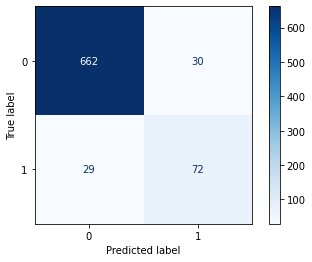

In [31]:
randomforest = RandomForestClassifier()
model = randomforest.fit(X_train_scaled, y_resampled_train)
# predict
train_pred =  model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
cnf_matrix = confusion_matrix(y_test, test_pred)
train_fpr, train_tpr, train_thresholds = roc_curve(y_resampled_train, train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_pred)
# classification report
print(f"Train accuracy : {accuracy_score(y_resampled_train, train_pred)}")
print(f"Test accuracy : {accuracy_score(y_test, test_pred)}")
print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print(classification_report(y_test, test_pred))
print("----MODEL PERFORMANCE")
print(f"accuracy : {accuracy_score(y_test, test_pred)}")
print(f"f1score : {f1_score(y_test, test_pred)}")
disp = ConfusionMatrixDisplay(confusion_matrix= cnf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

Text(0.5, 1.0, 'Random Forest Important Features')

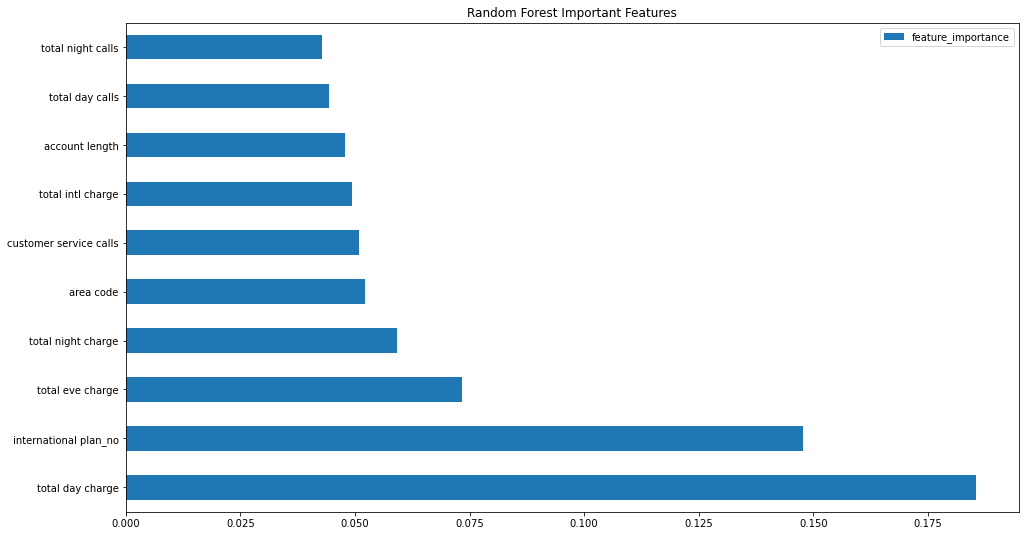

In [32]:
feature_importance = model.feature_importances_
X_train.columns.values
feature_df = pd.DataFrame({"feature_importance" : feature_importance,}, index=X_train.columns)
top_10_features = feature_df.sort_values(by="feature_importance",  ascending=False).head(10)
fig, ax = plt.subplots(figsize=(16, 9))
top_10_features.plot.barh(ax=ax)
ax.set_title("Random Forest Important Features")

##### Cross Validation
Cross validate the random forest

In [33]:
# Cross Validation
cross_val_scores = cross_val_score(randomforest, X_train_scaled , y_resampled_train, cv=5)
np.mean(cross_val_scores)

0.9390663390663392

The model has a 0.924 accuracy. 
The difference between the train accuracy(1) and the test accuracy(0.924) indicate that our model overfits on training data. 
The model however improves on the f1_score compared to the logistic regression model, recording 0.6939
We could try hyperparameter tuning to try and fix the overfitting, improve the 

### GRID SEARCH - HYPERPARAMETER TUNING

Each dataset is different, and the chances that the best possible parameters for a given dataset also happen to be the default parameters set by scikit-learn at instantiation is very low.  
We need to try hyperparameter tuning. 



In [34]:
# create the search grid
dt_param_grid = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [14,15,16,17,18],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,3,4,5]
}

grid_search = GridSearchCV(randomforest, dt_param_grid, cv=3, return_train_score=True)
grid_search_model = grid_search.fit(X_train_scaled, y_resampled_train)

Training AUC: 0.9852579852579852
Test AUC: 0.8156799061409032
precision score : 0.9218158890290038
recall score : 0.6732673267326733
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       692
           1       0.70      0.67      0.69       101

    accuracy                           0.92       793
   macro avg       0.83      0.82      0.82       793
weighted avg       0.92      0.92      0.92       793

Mean Training Score: 94.59%
Mean Test Score: 92.18%
Best Parameter Combination Found During Grid Search
{'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2}
f1_score : 0.686868686868687


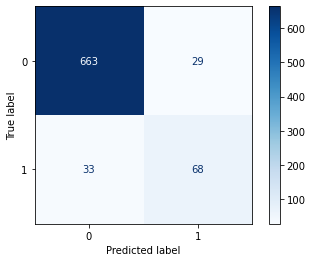

In [35]:
dt_gs_training_score = np.mean(grid_search.cv_results_["mean_train_score"])
test_pred = grid_search_model.predict(X_test_scaled)
train_pred = grid_search_model.predict(X_train_scaled)
# Mean test score
train_fpr, train_tpr , train_thresholds = roc_curve(y_resampled_train, train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_pred) 
dt_gs_testing_score = grid_search_model.score(X_test_scaled, y_test)
print(f"Training AUC: {auc(train_fpr, train_tpr)}")
print(f"Test AUC: {auc(test_fpr, test_tpr)}")
print(f"precision score : {accuracy_score(y_test, test_pred)}")
print(f"recall score : {recall_score(y_test, test_pred)}")
print(classification_report(y_test, test_pred))
print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print(f"Best Parameter Combination Found During Grid Search")
print(grid_search.best_params_)
print(f"f1_score : {f1_score(y_test, test_pred)}")
cnf_matrix = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=grid_search_model.classes_)
disp.plot(cmap=plt.cm.Blues)

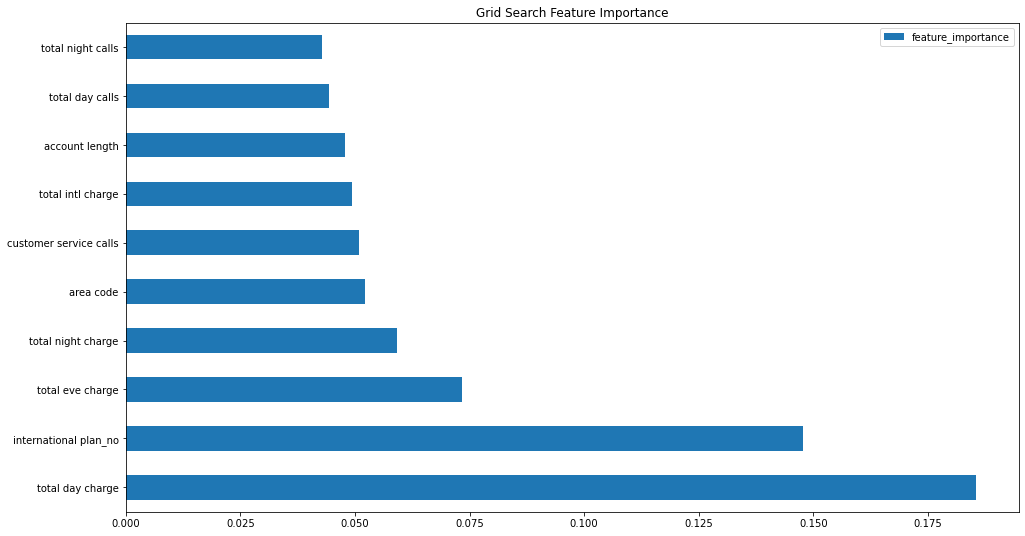

In [36]:
feature_importances = grid_search_model.best_estimator_.feature_importances_
feaure_df = pd.DataFrame({"importance": feature_importances}, index=X_train.columns)
top_10 = feature_df.sort_values(by="feature_importance", ascending=False).head(10)
forest_feature_importance(top_10, "Grid Search Feature Importance")

CAUTION: The cross validation below takes 10 minutes to run,  uncomment to run

In [79]:
# cross_val_scores = cross_val_score(grid_search , X_train_scaled , y_resampled_train, cv=5)
# np.mean(cross_val_scores)

0.9218673218673219

The Model has 91.93% score.  
The model reduces the overfitting compared to the randomforest model.  
Could we improve our model? The random forest we used above uses bagging. However we could try and use Gradient boosting's powerful method, ensemble method to try and improve our model.   
The cross validation score of our model is 92% 

### XGBOOST

XGBoost(eXtreme Gradient Boosting) is a stand alone algorithm that implements popular gradient boosting algorithms in the fastest, most performant way possible.
It is a great choice for classification tasks 

Training accuracy: 0.9918918918918919
Test accuracy: 0.9546027742749055
F1 score: 0.8125
Training AUC : 0.9918918918918919
Test AUC : 0.8767455502775711
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       692
           1       0.86      0.77      0.81       101

    accuracy                           0.95       793
   macro avg       0.91      0.88      0.89       793
weighted avg       0.95      0.95      0.95       793



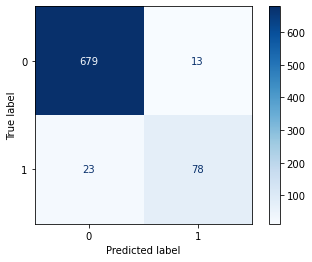

In [84]:
clf = XGBClassifier()

# Fit XGBClassifier
model = clf.fit(X_train_scaled, y_resampled_train)
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
train_fpr, train_tpr, train_thresholds = roc_curve(y_resampled_train, train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_pred)
training_accuracy = accuracy_score(y_resampled_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Training accuracy: {training_accuracy}")
print(f"Test accuracy: {test_accuracy}")
print(f"F1 score: {f1_score(y_test, test_pred)}")
print(f"Training AUC : {auc(train_fpr, train_tpr)}")
print(f"Test AUC : {auc(test_fpr, test_tpr)}")
print(classification_report(y_test, test_pred))
conf_matrix = confusion_matrix(y_test, test_pred )
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

The model test score is 0.9546.  
This is a good metric , however, there is an indication of overfitting the training data.  
We could try hyperparameter tune the XGBoost to try and reduce the overfitting and improve model performance

#### GRIDSEARCH-XGBOOST

In [76]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6, 7, 8],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [77]:
grid_search_xboost = GridSearchCV(clf, param_grid, cv=3, n_jobs=1 ,scoring="accuracy")
model = grid_search_xboost.fit(X_train_scaled, y_resampled_train)

Training Accuracy: 0.9992628992628992
Test Accuracy: 0.9407313997477932
F1 score: 0.7614213197969543
Training AUC : 0.9992628992628992
Test AUC : 0.856113718308247
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       692
           1       0.78      0.74      0.76       101

    accuracy                           0.94       793
   macro avg       0.87      0.86      0.86       793
weighted avg       0.94      0.94      0.94       793



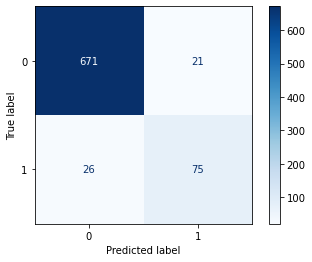

In [83]:
test_pred = grid_search_xboost.predict(X_test_scaled)
train_pred = grid_search_xboost.predict(X_train_scaled)
train_fpr, train_tpr, train_thresholds = roc_curve(y_resampled_train, train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_pred)

print(f"Training Accuracy: {accuracy_score(y_resampled_train, train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, test_pred)}")
print(f"F1 score: {f1_score(y_test, test_pred)}")
print(f"Training AUC : {auc(train_fpr, train_tpr)}")
print(f"Test AUC : {auc(test_fpr, test_tpr)}")
print(classification_report(y_test, test_pred))
conf_matrix = confusion_matrix(y_test, test_pred )
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

The model has a 94% test accuracy score.  
The difference in the test and train scores indicate the model may be indicating.   
The model has a test auc score of 0.856

# EVALUATION

I evaluate the models using precision and Accuracy. 
